# My solution for Q7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# test problem
def f(x):
    return x[0]**2 + x[1]**2 - x[0] * x[1] - 5*x[0] - 2*x[1]

In [3]:
# first-order differential of f
def dfdx(x):
    return np.array([2*x[0]-x[1]-5, 2*x[1]-x[0]-2])

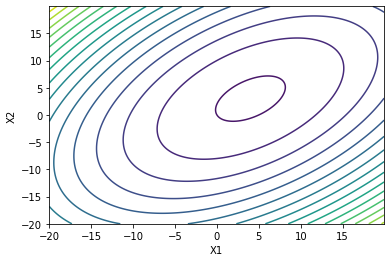

In [4]:
# plot problem
x = np.arange(-20, 20, 0.05)
y = np.arange(-20, 20, 0.05)

X, Y = np.meshgrid(x, y)

Z = [ f(x) for x in zip(X,Y) ]

cont=plt.contour(X,Y,Z, levels=20)

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [5]:
def optimize(optimizer, init, epoch):
    x = init
    history = [init]
    for _ in range(epoch):
        y = f(x)
        dx = dfdx(x)
        x = optimizer(x, dx)
        history.append(x)
    return x, y, np.array(history)

In [6]:
class RMSprop(object):
    def __init__(self, lr, alpha, eps=1e-6):
        self.v = 0
        self.lr = lr
        self.alpha = alpha
        self.eps = eps
    def __call__(self, x, dx):
        self.v = self.alpha * self.v + (1 - self.alpha) * dx**2
        update = - self.lr / np.sqrt(self.v + self.eps) * dx
        return x + update

In [7]:
x, y, history = optimize(RMSprop(0.1, 0.99), np.array([10,-10]), 100)

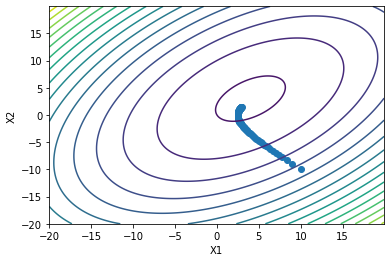

In [8]:
# plot problem and optimazation result
x = np.arange(-20, 20, 0.05)
y = np.arange(-20, 20, 0.05)

X, Y = np.meshgrid(x, y)

Z = [ f(x) for x in zip(X,Y) ]

plt.contour(X,Y,Z, levels=20)
plt.scatter(history[:,0], history[:,1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [9]:
class AdaDelta(object):
    def __init__(self, lr, rho, eps=1e-6):
        self.lr = lr
        self.rho = rho
        self.eps = eps
        self.v = 0
        self.u = 0
    def __call__(self, x, dx):
        self.v = self.rho * self.v + (1 - self.rho) * dx**2
        update = - np.sqrt(self.u + self.eps) / np.sqrt(self.v + self.eps) * dx
        self.u = self.rho * self.u + (1 - self.rho) * update**2
        return x + self.lr * update

In [10]:
x, y, history = optimize(AdaDelta(1, 0.9), np.array([-15,15]), 10000)

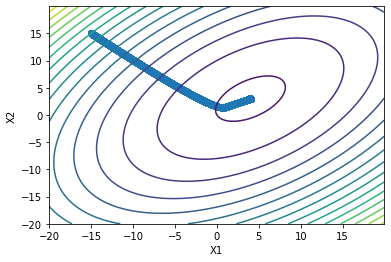

In [11]:
# plot problem and optimazation result
x = np.arange(-20, 20, 0.05)
y = np.arange(-20, 20, 0.05)

X, Y = np.meshgrid(x, y)

Z = [ f(x) for x in zip(X,Y) ]

plt.contour(X,Y,Z, levels=20)
plt.scatter(history[:,0], history[:,1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [12]:
class AMSGraad(object):
    def __init__(self, lr, alpha, beta, eps=1e-6):
        self.lr = lr
        self.alpha = alpha
        self.beta = beta
        self.eps = eps
        self.v = 0
        self.vhat = 0
        self.m = 0
    def __call__(self, x, dx):
        self.m = self.alpha * self.m + (1 - self.alpha) * dx
        self.v = self.beta * self.v + (1 - self.beta) * dx**2
        self.vhat = np.maximum(self.vhat, self.v) 
        update = - self.lr / np.sqrt(self.vhat + self.eps) * self.m
        return x + update

In [13]:
x, y, history = optimize(AMSGraad(1, 0.9, 0.9), np.array([-15,15]), 10000)

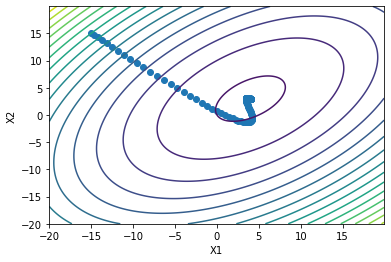

In [14]:
# plot problem and optimazation result
x = np.arange(-20, 20, 0.05)
y = np.arange(-20, 20, 0.05)

X, Y = np.meshgrid(x, y)

Z = [ f(x) for x in zip(X,Y) ]

plt.contour(X,Y,Z, levels=20)
plt.scatter(history[:,0], history[:,1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()